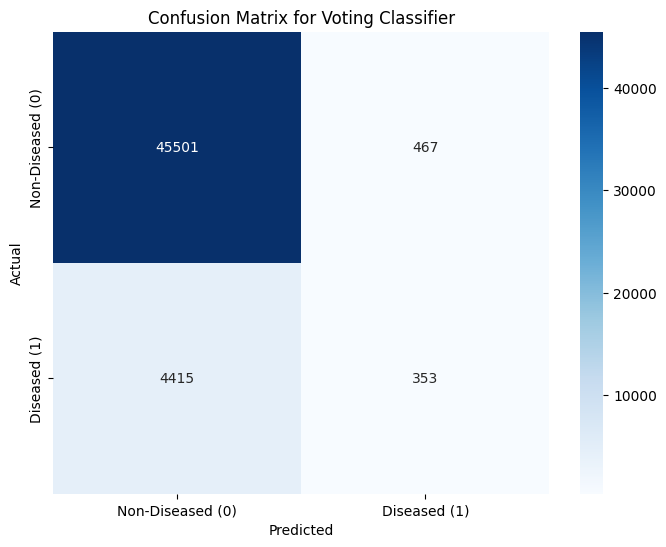

Voting Classifier Performance:
Sensitivity: 0.0740
Specificity: 0.9898
Accuracy: 0.9038
MCC: 0.1478
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.43      0.07      0.13      4768

    accuracy                           0.90     50736
   macro avg       0.67      0.53      0.54     50736
weighted avg       0.87      0.90      0.87     50736

Time taken for training: 17.0500 seconds


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load dataset
data = pd.read_csv('Heart_disease.csv')

# Define the target column
target = "HeartDiseaseorAttack"

# Split the data into features and target
X = data.drop(target, axis=1)  # Features
y = data[target]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create the VotingClassifier with majority voting
voting_clf = VotingClassifier(estimators=[('rf', rf_classifier), ('dt', dt_classifier)], voting='hard')

# Start timing the training process
start_time = time.time()

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# End timing
training_time = time.time() - start_time

# Predict on test data
y_pred = voting_clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate Sensitivity (Recall), Specificity, and MCC
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
mcc = matthews_corrcoef(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diseased (0)', 'Diseased (1)'], yticklabels=['Non-Diseased (0)', 'Diseased (1)'])
plt.title('Confusion Matrix for Voting Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Evaluate Voting Classifier
print("Voting Classifier Performance:")

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print(f"MCC: {mcc:.4f}")  # Display MCC
print(classification_report(y_test, y_pred))

print(f"Time taken for training: {training_time:.4f} seconds")  # Display training time
